In [1]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.sql.functions import *
from datetime import datetime
from pyspark.sql.functions import to_date, to_timestamp

import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
confirmed_cases = spark.table("g6_confirmed_cases_csv")

In [3]:
confirmed_cases_pandas = confirmed_cases.toPandas()
confirmed_cases_pandas['Date'] = pd.to_datetime(confirmed_cases_pandas['Date'], infer_datetime_format = True)
confirmed_cases_init = confirmed_cases_pandas.set_index('Date')

In [4]:
#canada_cases = confirmed_cases[["Date", "canada_cases"]]
canada_final = confirmed_cases_init[["canada_cases"]]
#japan_cases = confirmed_cases[["Date", "japan_cases"]]
japan_final = confirmed_cases_init[["japan_cases"]]
#italy_cases = confirmed_cases[["Date", "italy_cases"]]
italy_final = confirmed_cases_init[["italy_cases"]]
#uk_cases = confirmed_cases[["Date", "uk_cases"]]
uk_final = confirmed_cases_init[["uk_cases"]]
#germany_cases = confirmed_cases[["Date", "germany_cases"]]
germany_final = confirmed_cases_init[["germany_cases"]]
#france_cases = confirmed_cases[["Date", "france_cases"]]
france_final = confirmed_cases_init[["france_cases"]]

japan_final["japan_cases"] = japan_final["japan_cases"].replace(0, 1)

italy_final["italy_cases"] = italy_final["italy_cases"].replace(0, 1)

uk_final["uk_cases"] = uk_final["uk_cases"].replace(0, 1)

#germany_final["germany_cases"] = germany_final["germany_cases"].replace(0, 1)

france_final["france_cases"] = france_final["france_cases"].replace(0, 1)

ts_jap_log = np.log(japan_final)

ts_ita_log = np.log(italy_final)

ts_uk_log = np.log(uk_final)

ts_fra_log = np.log(france_final)

#ts_log['canada_cases'] = ts_log['canada_cases'].diff()
ts_jap_log['japan_cases'] = ts_jap_log['japan_cases'].diff()
ts_ita_log['italy_cases'] = ts_ita_log['italy_cases'].diff()
ts_uk_log['uk_cases'] = ts_uk_log['uk_cases'].diff()
#ts_ger_log['germany_cases'] = ts_ger_log['germany_cases'].diff()
ts_fra_log['france_cases'] = ts_fra_log['france_cases'].diff()

#ts_log['canada_cases'] = ts_log['canada_cases'].fillna(0)
ts_jap_log['japan_cases'] = ts_jap_log['japan_cases'].fillna(0)
ts_ita_log['italy_cases'] = ts_ita_log['italy_cases'].fillna(0)
ts_uk_log['uk_cases'] = ts_uk_log['uk_cases'].diff().fillna(0)
#ts_ger_log['germany_cases'] = ts_ger_log['germany_cases'].fillna(0)
ts_fra_log['france_cases'] = ts_fra_log['france_cases'].fillna(0)

can_diff = canada_final
#jap_diff = japan_final
#ita_diff = italy_final
#uk_diff = uk_final
#ger_diff = germany_final
#fra_diff = france_final

can_diff['canada_cases'] = can_diff['canada_cases'].diff()
#jap_diff['japan_cases'] = jap_diff['japan_cases'].diff()
#ita_diff['italy_cases'] = ita_diff['italy_cases'].diff()
#uk_diff['uk_cases'] = uk_diff['uk_cases'].diff()
#ger_diff['germany_cases'] = ger_diff['germany_cases'].diff()
#fra_diff['france_cases'] = fra_diff['france_cases'].diff()

can_diff['canada_cases'] = can_diff['canada_cases'].fillna(0)

can_diff.drop(can_diff.index[0], inplace=True)

ts_jap_log.drop(ts_jap_log.index[0], inplace=True)

ts_ita_log.drop(ts_ita_log.index[0], inplace=True)

ts_uk_log.drop(ts_uk_log.index[0], inplace=True)

germany_final.drop(germany_final.index[0], inplace=True)

ts_fra_log.drop(ts_fra_log.index[0], inplace=True)

/local_disk0/tmp/1597784351842-0/PythonShell.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 import time
/local_disk0/tmp/1597784351842-0/PythonShell.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 
/local_disk0/tmp/1597784351842-0/PythonShell.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from six import StringIO # cString does not support unicode well
/local_disk0/tmp/1597784351842-0/PythonShell.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 
/local_disk0/tmp/1597784351842-0/PythonShell.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from pyspark.conf import SparkConf
/local_disk0/tmp/1597784351842-0/PythonShell.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 from databricksCli import init_databricks_cli_config_provider
/databricks/python/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
 errors=errors)

In [5]:
def train(input, order, country):
  model = ARIMA(input.astype(float), order=order) 
  results_ARIMA = model.fit(maxiter=500)  
  print(results_ARIMA.summary())

  fitted_values  = results_ARIMA.predict(1,len(input)-1,typ='linear')
  fitted_values_frame = fitted_values.to_frame()

  x = input.merge(fitted_values_frame, how='outer', left_index=True, right_index=True)

  fig= x.plot(y = [country, 0], figsize=(20,5))
  display(fig.figure)

In [6]:
def pred(train, order, start, end, test):
  model_test = ARIMA(train.astype(float), order=order) 
  results_test_ARIMA = model_test.fit(maxiter=500) 

  fitted_values_test  = results_test_ARIMA.predict(start, end,typ='linear') 
  fitted_values_test_frame = fitted_values_test.to_frame()

  fig, ax = plt.subplots(figsize=(20,5))
  ax.set(title='Predictions', xlabel='Date', ylabel='Total Number of Cases')
  ax.plot(train, 'blue', label='training data') 
  ax.plot(test, 'black', label='test data actuals')
  ax.plot(fitted_values_test_frame, 'r', label='test data forecast')  # np.exp(predictions_series)
  legend = ax.legend(loc='upper left')
  legend.get_frame().set_facecolor('w')
  display(fig.figure, np.sqrt(metrics.mean_squared_error(can_diff.iloc[start - 1:end], fitted_values_test_frame)))
  
  return np.sqrt(metrics.mean_squared_error(can_diff.iloc[start - 1:end], fitted_values_test_frame))

In [7]:
from sklearn import metrics

def smape(true, pred):
  print(np.sqrt(metrics.mean_squared_error(true, pred)))

# 30 days (Canada)

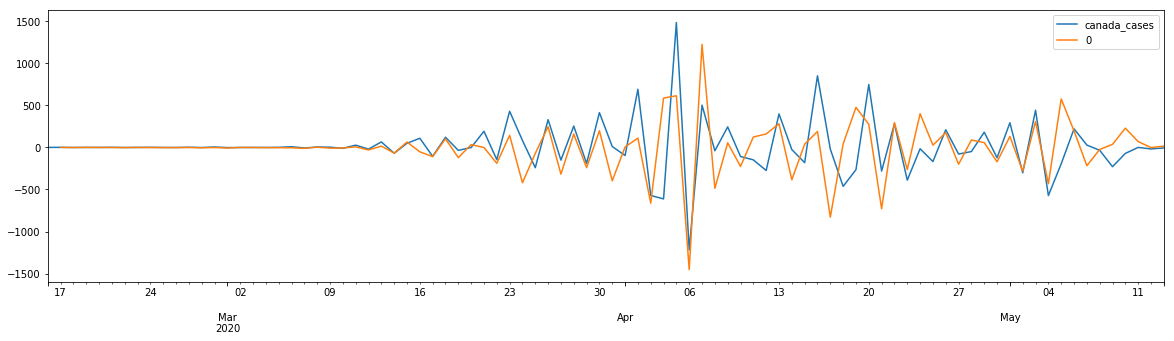

In [9]:
train(can_diff.iloc[:88], (0, 1, 1), "canada_cases")

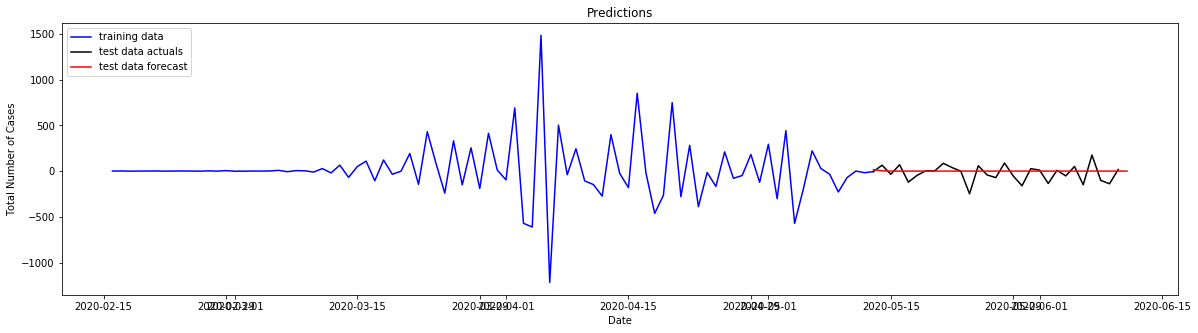

In [10]:
can_30 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 116, can_diff.iloc[87:116])

In [11]:
can_30

Out[115]: 91.84121040574516

# 14 days (Canada)

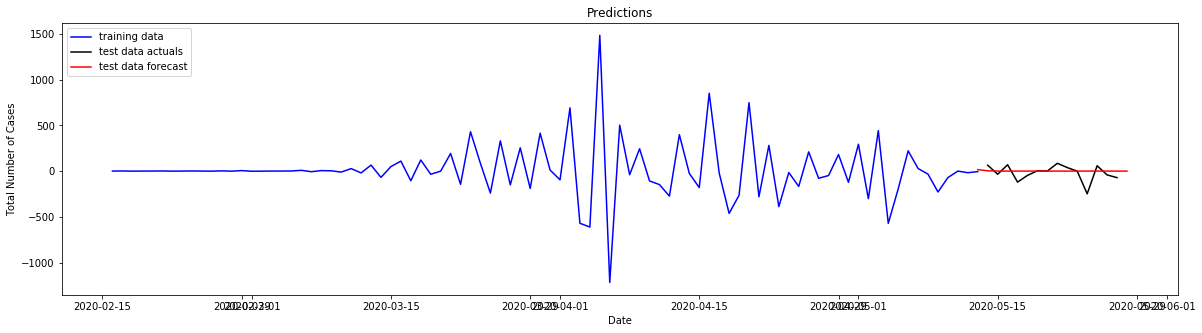

In [13]:
can_14_1 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 102, can_diff.iloc[88:102])

In [14]:
can_14_1

Out[118]: 82.52149543536471

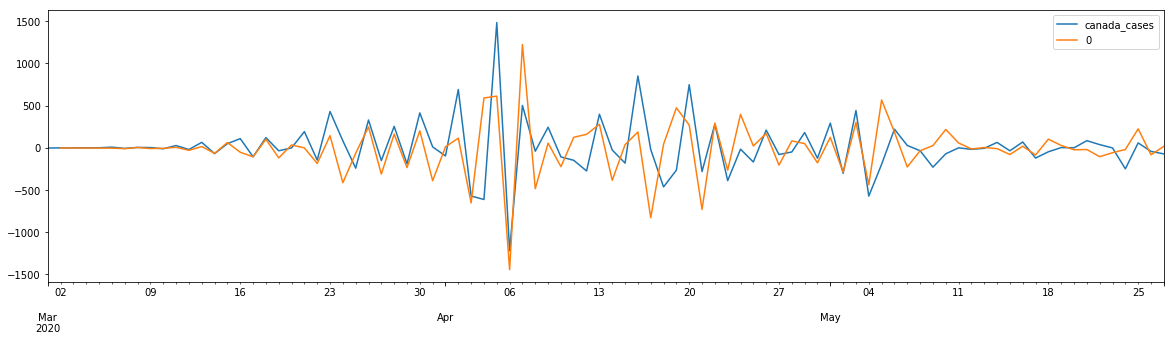

In [15]:
train(can_diff.iloc[14:102], (0, 1, 1), "canada_cases")

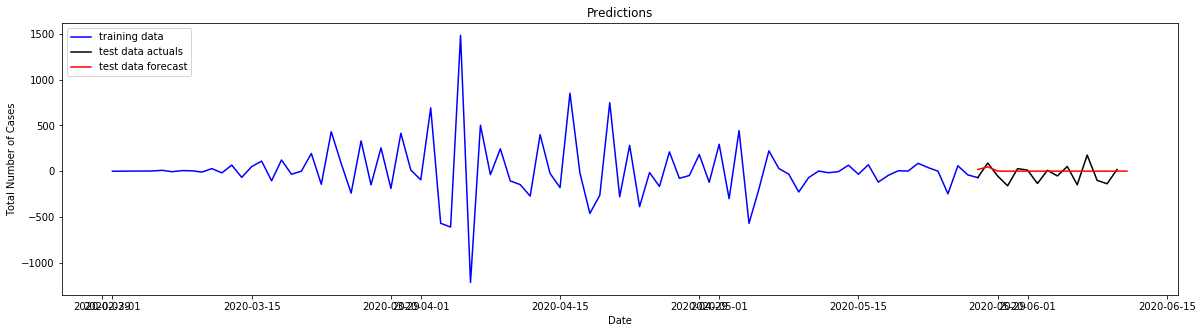

In [16]:
can_14_2 = pred(can_diff.iloc[14:102], (0, 1, 1), 87, 102, can_diff.iloc[101:116])

In [17]:
can_14_2

Out[121]: 83.46844199972914

# 7 days (Canada)

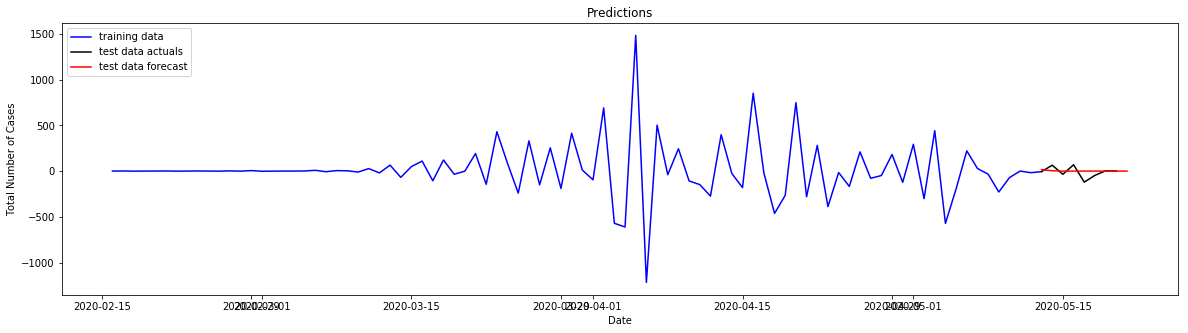

In [19]:
can_7_1 = pred(can_diff.iloc[:88], (0, 1, 1), 87, 95, can_diff.iloc[87:95])

In [20]:
can_7_1

Out[123]: 55.88053590895589

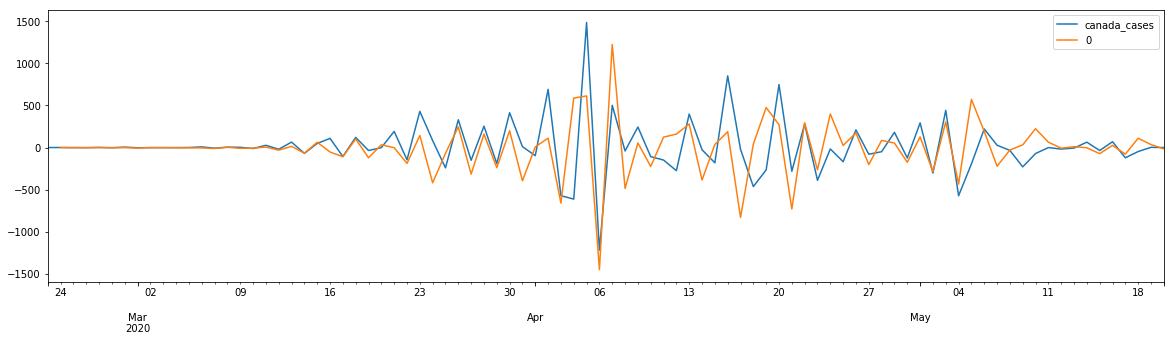

In [21]:
train(can_diff.iloc[7:95], (0, 1, 1), "canada_cases")

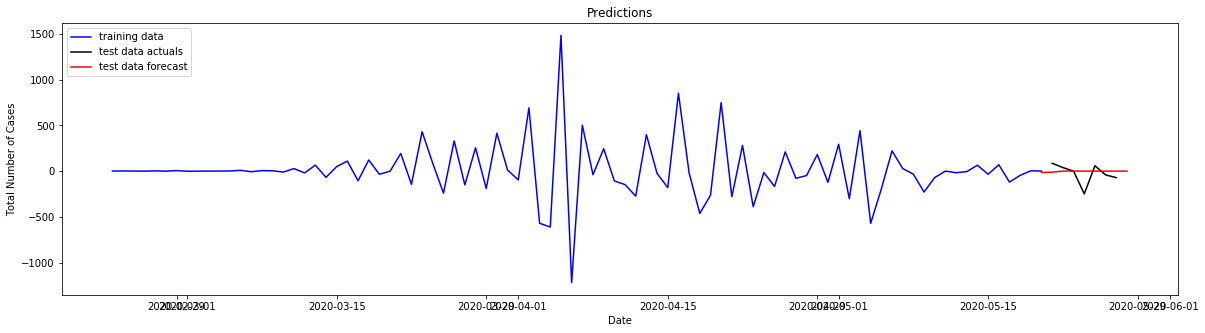

In [22]:
can_7_2 = pred(can_diff.iloc[7:95], (0, 1, 1), 87, 95, can_diff.iloc[95:102])

In [23]:
can_7_2

Out[126]: 54.69095939464316

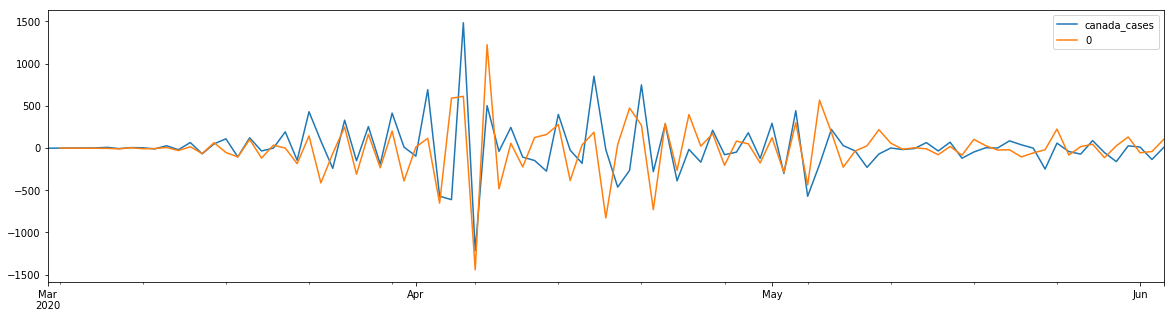

In [24]:
train(can_diff.iloc[14:109], (0, 1, 1), "canada_cases")

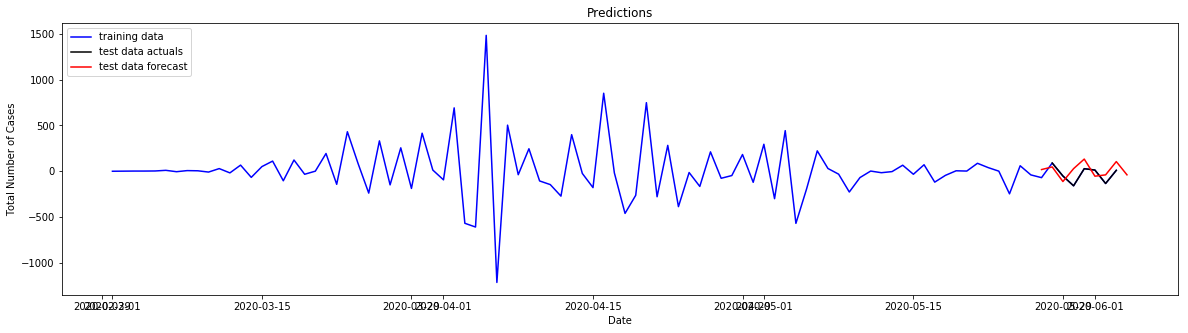

In [25]:
can_7_3 = pred(can_diff.iloc[14:109], (0, 1, 1), 87, 95, can_diff.iloc[102:109])

In [26]:
can_7_3

Out[130]: 81.18480064590575

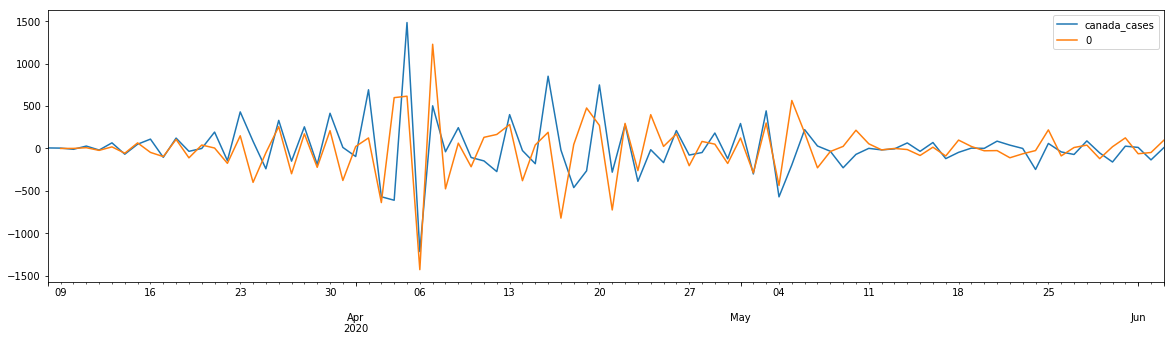

In [27]:
train(can_diff.iloc[21:109], (0, 1, 1), "canada_cases")

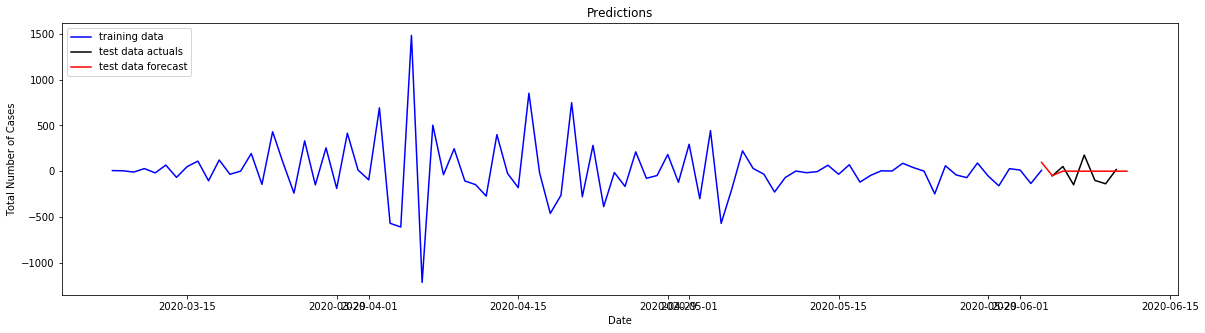

In [28]:
can_7_4 = pred(can_diff.iloc[21:109], (0, 1, 1), 87, 95, can_diff.iloc[109:116])

In [29]:
can_7_4

Out[133]: 67.99631897238943

# 1 day (Canada)

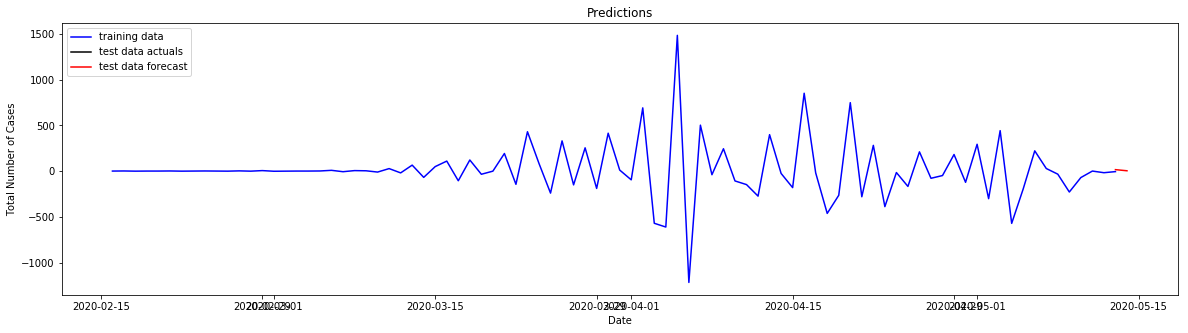

In [32]:
can_1_1 = pred(can_diff.iloc[0:88], (0, 1, 1), 87, 88, can_diff.iloc[87:88])

In [33]:
can_1_1

Out[138]: 24.593902181702198

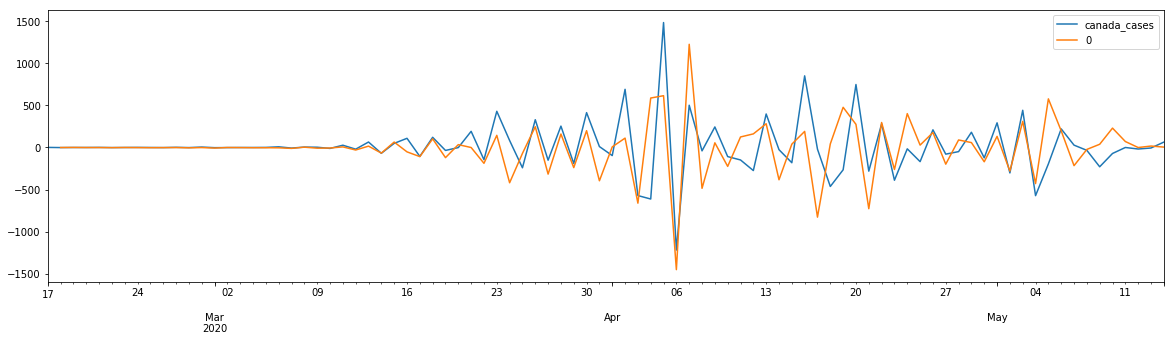

In [34]:
train(can_diff.iloc[1:89], (0, 1, 1), "canada_cases")

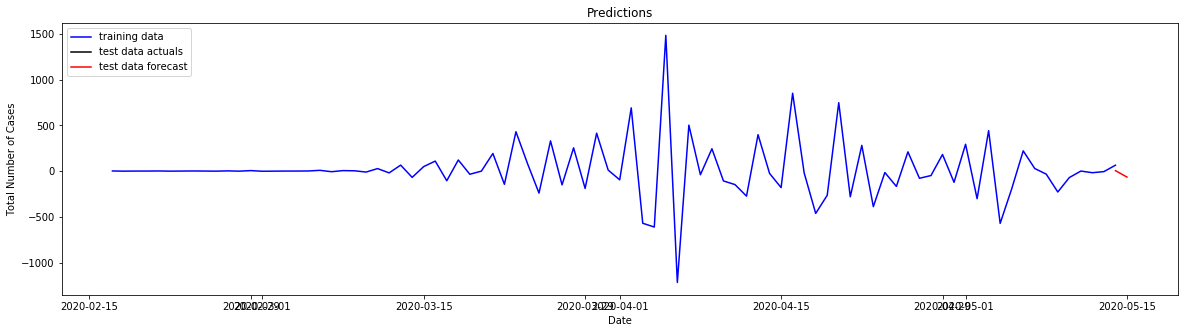

In [35]:
can_1_2 = pred(can_diff.iloc[1:89], (0, 1, 1), 87, 88, can_diff.iloc[88:89])

In [36]:
can_1_2

Out[142]: 45.09786780164955

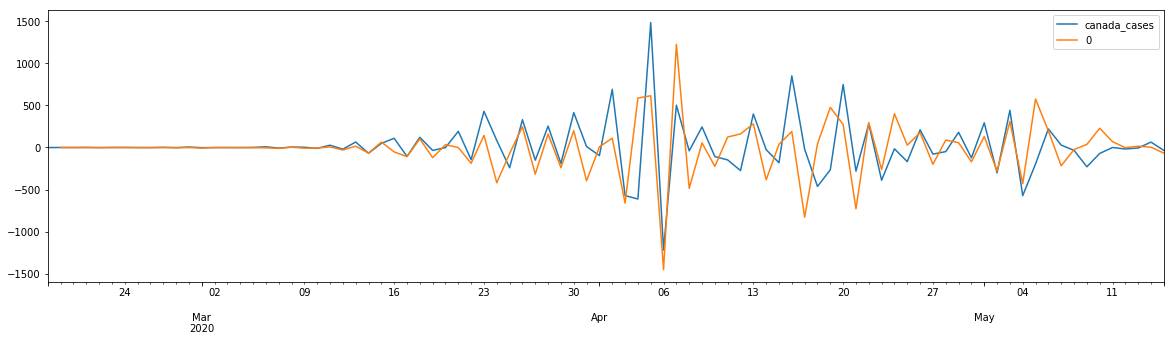

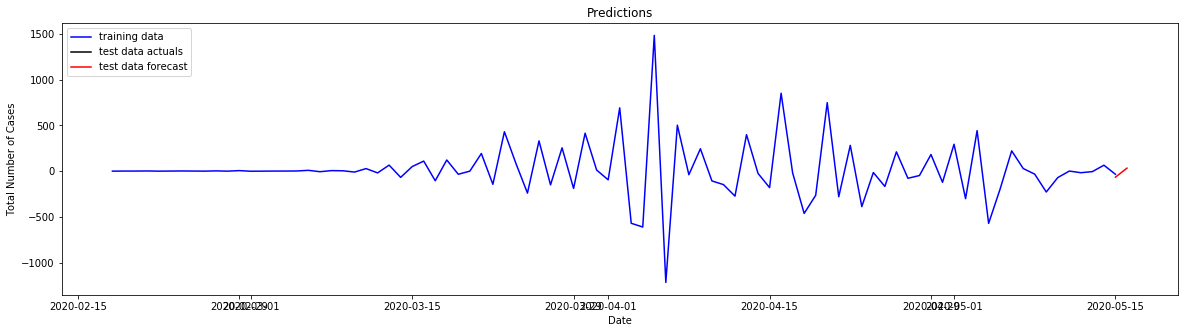

In [37]:
train(can_diff.iloc[2:90], (0, 1, 1), "canada_cases")

can_1_3 = pred(can_diff.iloc[2:90], (0, 1, 1), 87, 88, can_diff.iloc[89:90])

In [38]:
can_1_3

Out[145]: 43.63566974834617

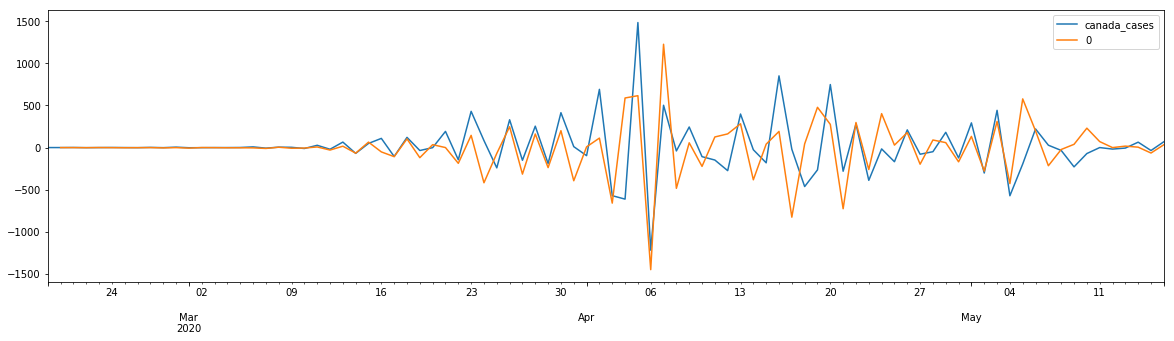

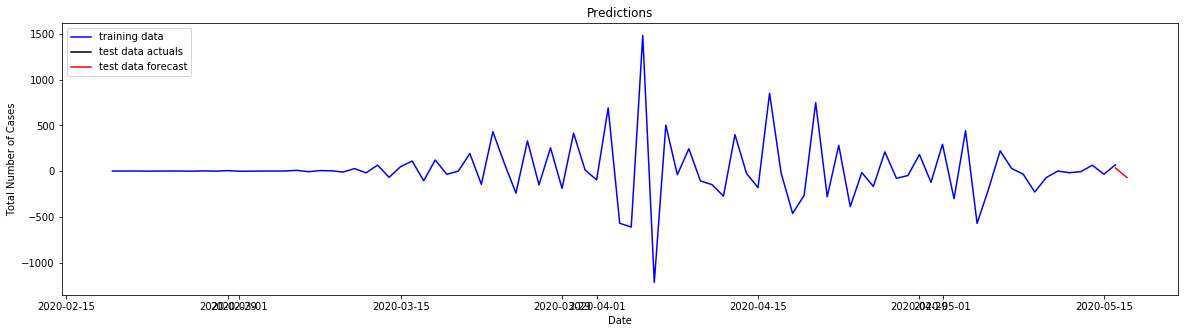

In [39]:
train(can_diff.iloc[3:91], (0, 1, 1), "canada_cases")

can_1_4 = pred(can_diff.iloc[3:91], (0, 1, 1), 87, 88, can_diff.iloc[90:91])

In [40]:
can_1_4

Out[158]: 58.568566665503006

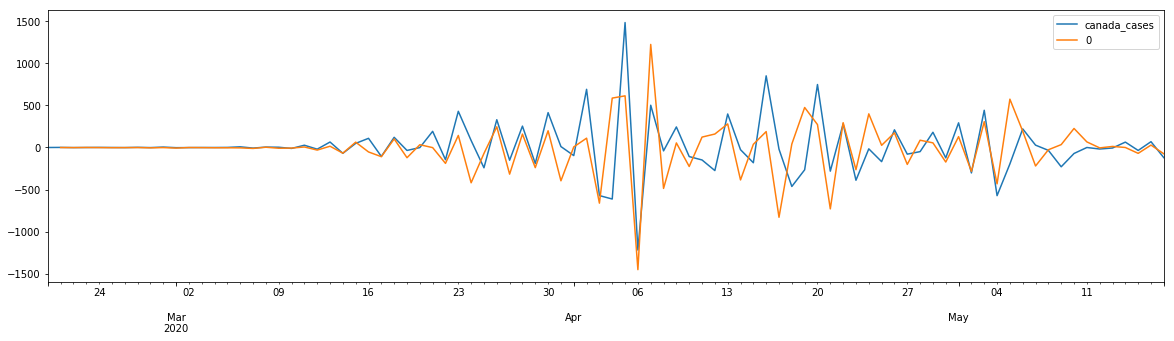

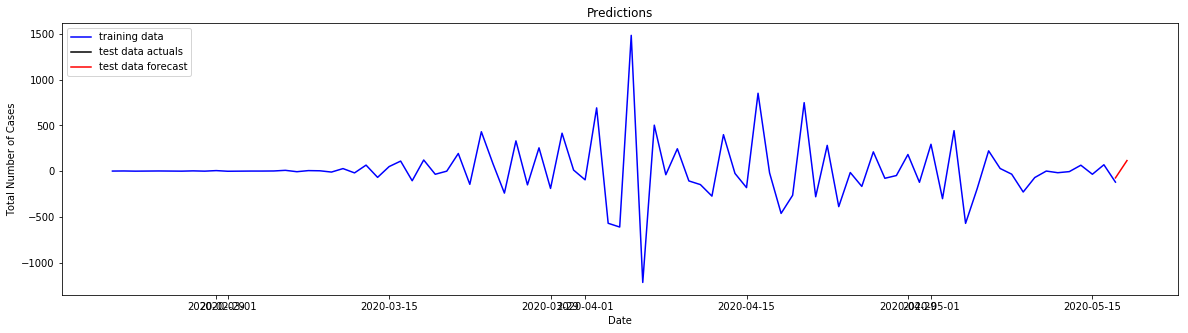

In [41]:
train(can_diff.iloc[4:92], (0, 1, 1), "canada_cases")

can_1_5 = pred(can_diff.iloc[4:92], (0, 1, 1), 87, 88, can_diff.iloc[91:92])

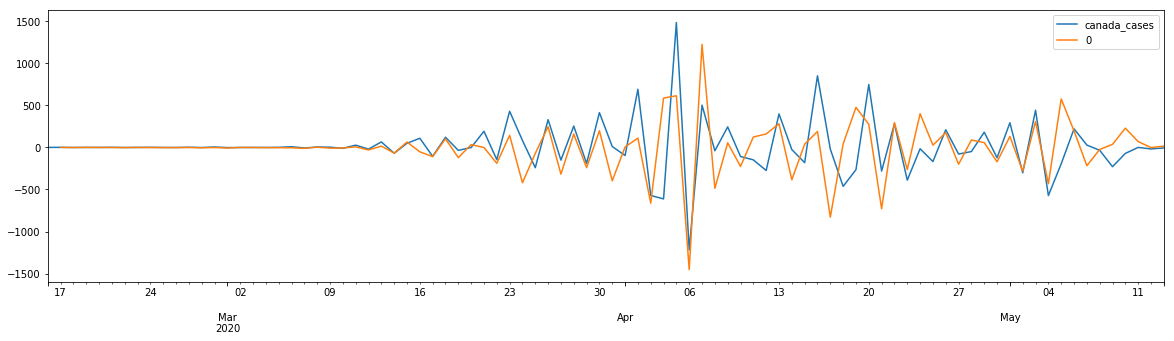

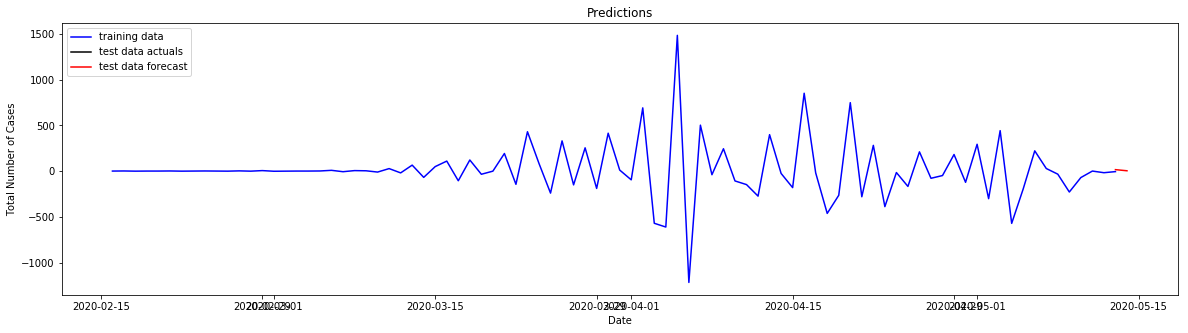

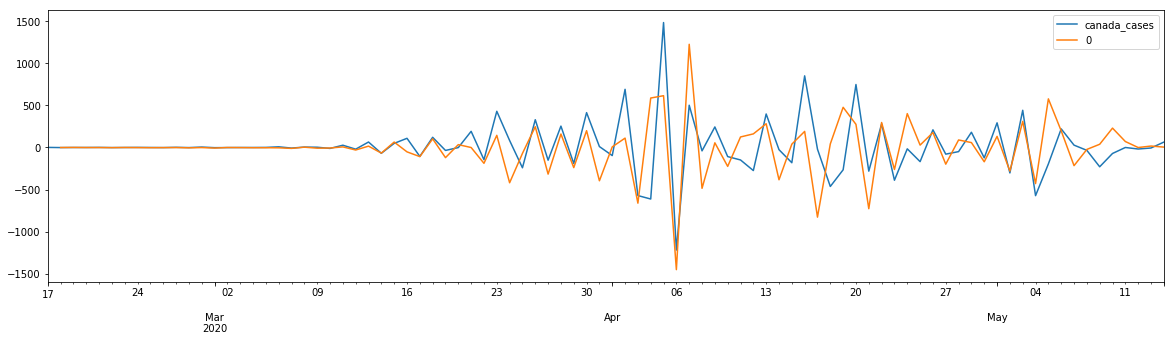

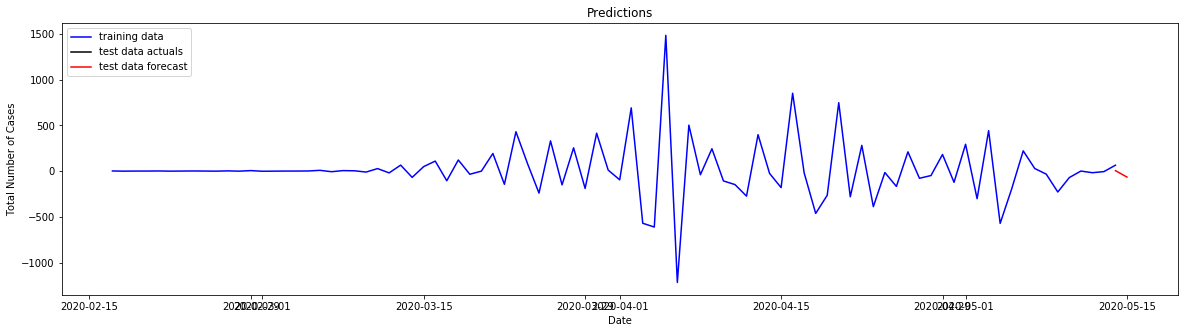

In [42]:
i = 0
j = 87
k = []
for l in range (88, 116):
  #first = train(can_diff.iloc[i:l], (0, 1, 1), "canada_cases")
  second = pred(can_diff.iloc[i:l], (0, 1, 1), 87, 88, can_diff.iloc[j:l])
  k = k.append(second)
  i += 1
  j += 1

In [43]:
k

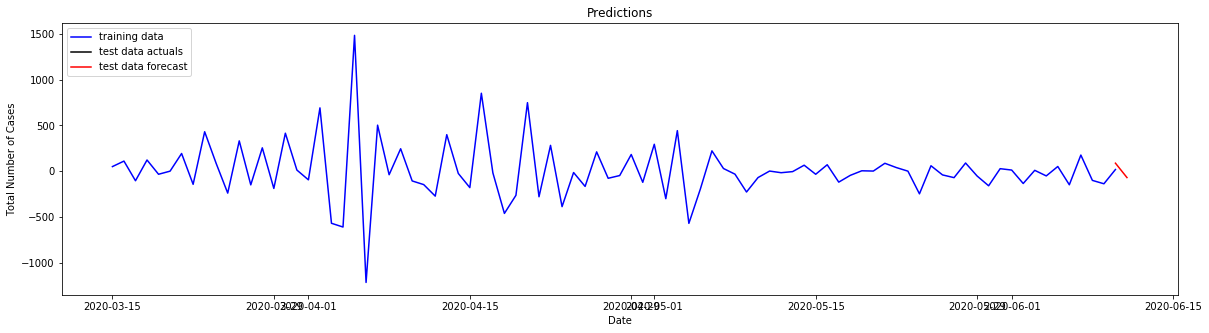

In [44]:
#can_1_1 = pred(can_diff.iloc[0:88], (0, 1, 1), 87, 88, can_diff.iloc[87:88])

#can_1_30 = pred(can_diff.iloc[28:116], (0, 1, 1), 87, 88, can_diff.iloc[115:116])